# Домашняя работа №1

### Atention!

Пожалуйста, пришлите данную работу в виде архива, где лежит Jupyter Notebook и 3 *.py файла - всю папку с названием homework.

In [1]:
import cv2
import numpy as np
import time

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def ImageOnPlot(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.
    
    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))
    
    axs.imshow(image)
    axs.axis('off')
    plt.plot()

# Задача №1 - Лабиринт

Реализуйте алгоритм поиска выхода из лабиринта по растровому изобажению.
Вам нужно написать код, который будет находить путь (координаты пикселей) от заданного входа сверху до выхода снизу.

Отрисуйте получившийся маршрут на карте с помощью функции ```plot_maze_path(img, coords)``` или воспользуйтесь вам известным графическим инструментом.

__Input:__

Изображение лабиринта в кодировке $RGB$.

Все карты лежат на [яндекс-диске](https://yadi.sk/d/qEWVZk2picDdZw)

__Ouput:__

Массив координат пути через лабиринт в виде ```(np.array(x), np.array(y))```. 

__Оценка:__

Оценивается __каждое__ успешное решение лабиринта (всего их 4). Решение хотя бы одного лабиринта даёт 40% баллов за задачу, каждый следующий добавляет ещё 20%. Если алгоритм работает порядка 10^-1 секунды, то за решение задачи полагается дополнительно 50%.
Пример решенной задачи.<img src="https://b.radikal.ru/b22/1906/56/df991f2221a7.png" width="300">

In [3]:
from task_1 import MazeSolver

In [4]:
def PlotMazePath(image: np.ndarray, coords: tuple) -> np.ndarray:
    """
    Нарисовать путь через лабиринт на изображении. 
    Вспомогательная функция.

    :param image: изображение лабиринта
    :param coords: координаты пути через лабиринт типа (x, y) где x и y - массивы координат точек
    :return img_wpath: исходное изображение с отрисованными координатами 
    """
    if image.ndim != 3:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        
    img_wpath = image.copy()
    x_coords, y_coords = coords

    for i in range(len(x_coords) - 1):
        curr = (x_coords[i], y_coords[i])
        next = (x_coords[i + 1], y_coords[i + 1])

        cv2.line(img_wpath, curr, next, [0, 0, 255], 1)
    return img_wpath


Загрузим тестовое изображение и отобразим его.

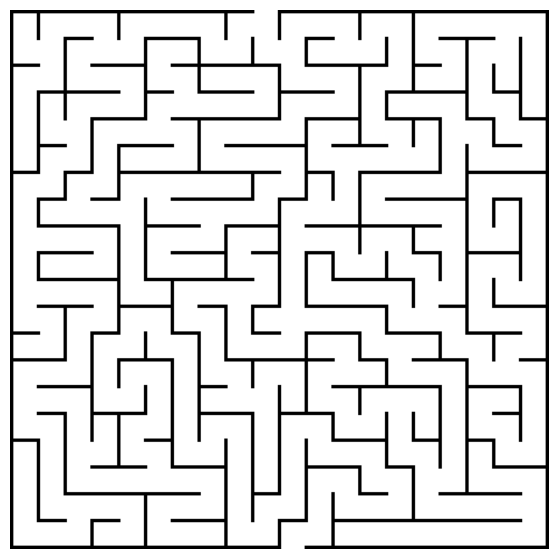

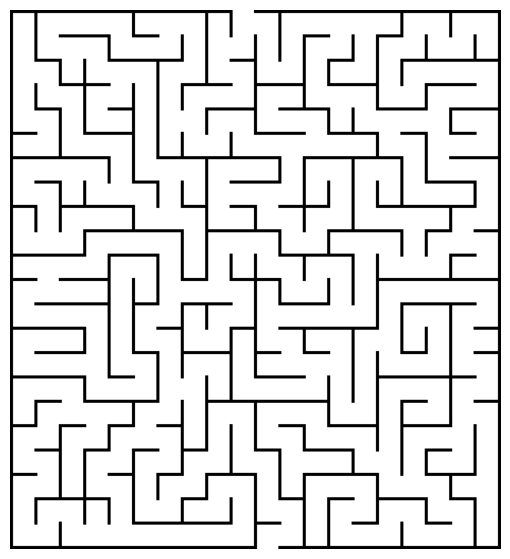

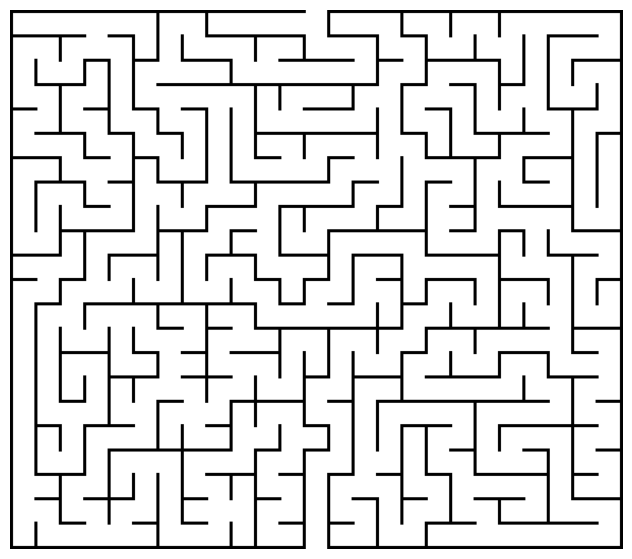

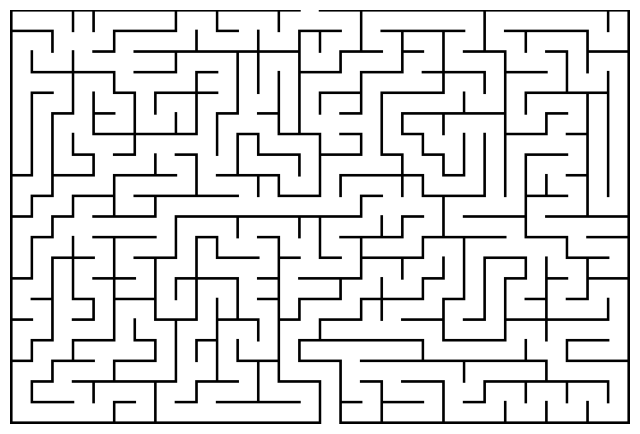

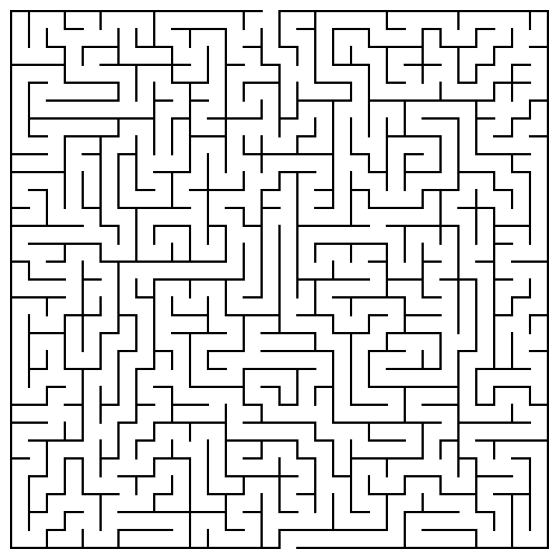

In [5]:
test_images = [cv2.imread('task_1/20 by 20 orthogonal maze.png'),
               cv2.imread('task_1/20 by 22 orthogonal maze.png'),
               cv2.imread('task_1/25 by 22 orthogonal maze.png'),
               cv2.imread('task_1/30 by 20 orthogonal maze.png'),
               cv2.imread('task_1/30 by 30 orthogonal maze.png')]  # загрузить тестовую картинку


for image in test_images:
    ImageOnPlot(image)

Теперь ваша задача реализовать функцию ```plot_maze_path``` в ```task_1.py``` для того, чтобы найти координаты пути через лабиринт.

Algorithm operation time (s): 0.012
Algorithm operation time (s): 0.01
Algorithm operation time (s): 0.011
Algorithm operation time (s): 0.02
Algorithm operation time (s): 0.015


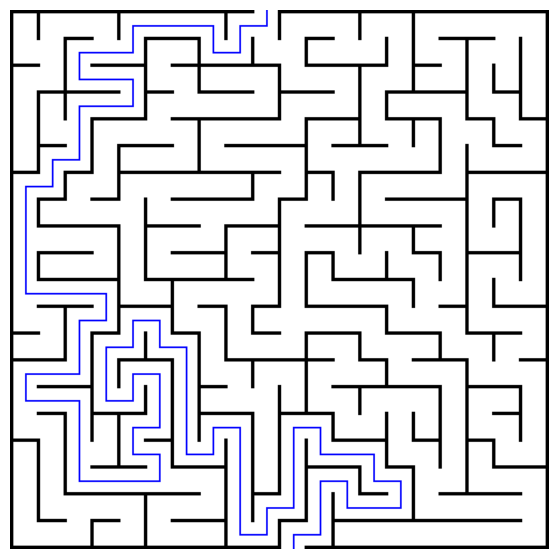

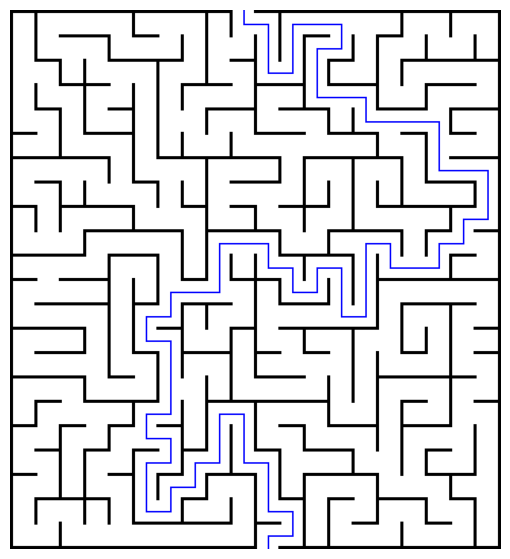

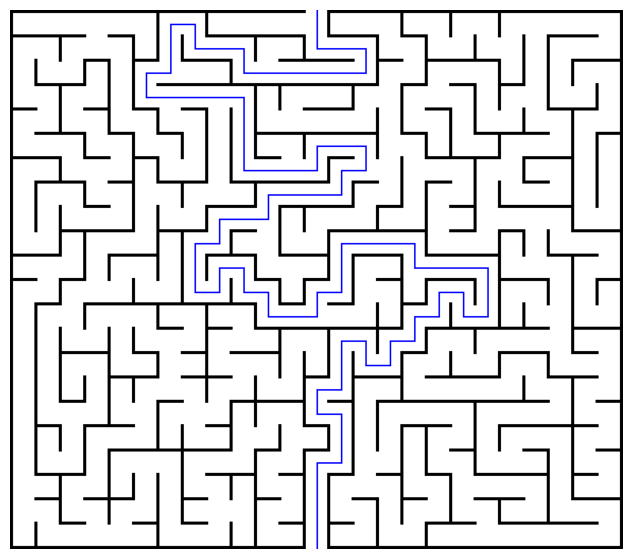

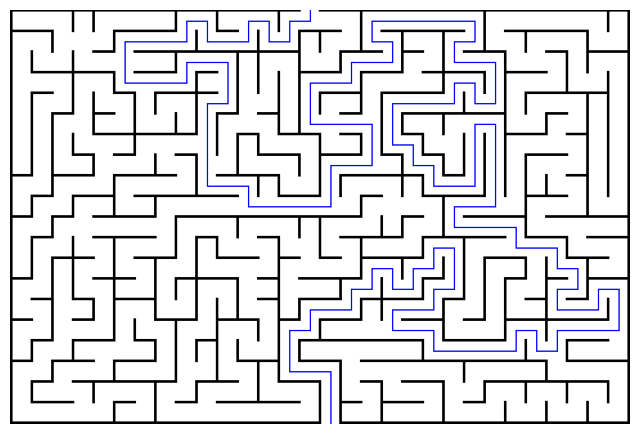

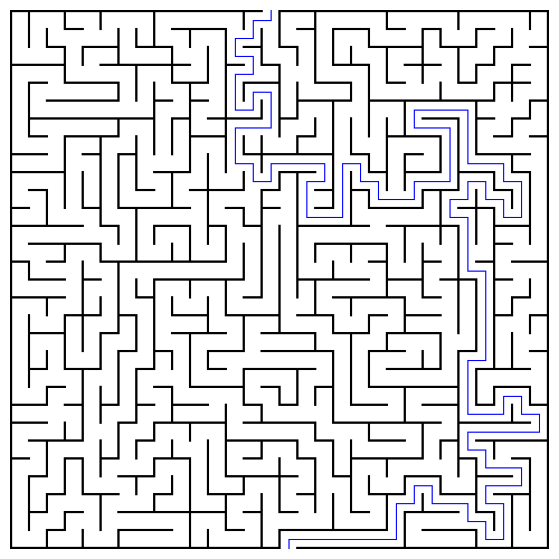

In [6]:
for test_image in test_images:    
    time_0 = time.time()
    mz = MazeSolver(test_image)
    way_coords = mz.FindWayFromMaze()  # вычислить координаты пути через лабиринт
    print(f"Algorithm operation time (s): {np.round(time.time() - time_0, 3)}")

    image_with_way = PlotMazePath(test_image, way_coords)

    ImageOnPlot(image_with_way)

# Задача №2 - Пробки в городе

Требуется написать программу, которая на вход принимает картинку, на которой схематически изображена машинка на дороге с $N$ полосами и препятствия на полосах. Соответствующие объекты обозначены цветами, которые сохраняются на всех изображениях. 

Результатом работы программы является номер полосы, на которую нужно перестроиться или сообщение о том, что перестраиваться не нужно.

__Оценка:__

За успешное решение хотя бы одного изображение даётся 50% от общего числа баллов и по 25% за каждое следующее.

**Примечание: номер дороги считается слева направо, отсчет начинается с нуля.**

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/8z84sJG/image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/Z6m4XFz/image_01.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [7]:
from task_2 import FindRoadNumber

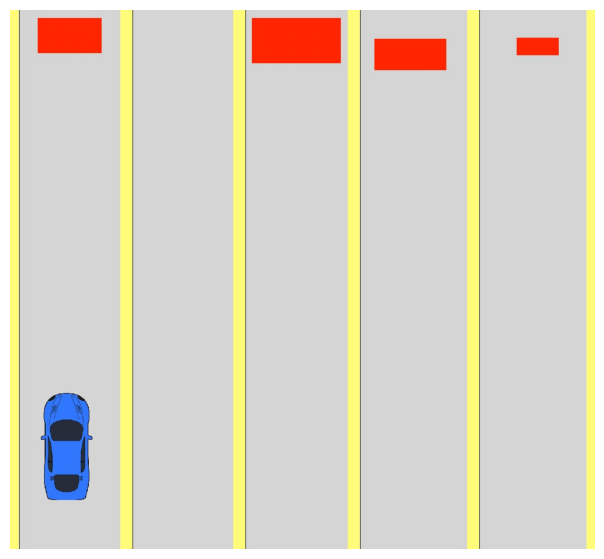

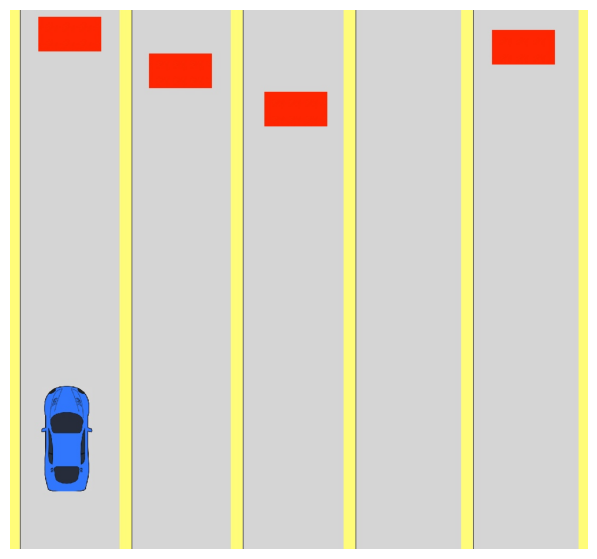

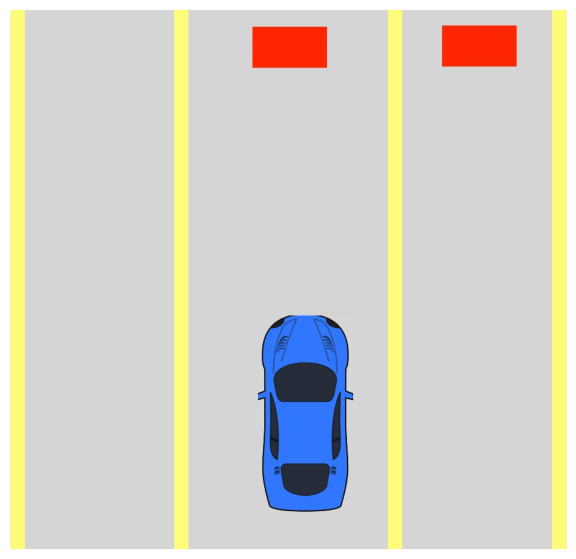

In [8]:
test_image_1 = cv2.imread('task_2/image_00.jpg')
test_image_2 = cv2.imread('task_2/image_01.jpg')
test_image_3 = cv2.imread('task_2/image_02.jpg')
test_image_1 = cv2.cvtColor(test_image_1, cv2.COLOR_BGR2RGB)
test_image_2 = cv2.cvtColor(test_image_2, cv2.COLOR_BGR2RGB)
test_image_3 = cv2.cvtColor(test_image_3, cv2.COLOR_BGR2RGB)
grey_high, grey_low = (180.0, 18, 230), (0.0, 0, 40)
blue_high, blue_low = (128.0, 255, 255), (90.0, 50, 70)
red_high, red_low = (9.0, 255, 255), (0.0, 50, 70)
ImageOnPlot(test_image_1)
ImageOnPlot(test_image_2)
ImageOnPlot(test_image_3)

In [9]:
road_number = FindRoadNumber(test_image_1)

print(f'Нужно перестроиться на дорогу номер {road_number}')

road_number = FindRoadNumber(test_image_2)

print(f'Нужно перестроиться на дорогу номер {road_number}')

road_number = FindRoadNumber(test_image_3)

print(f'Нужно перестроиться на дорогу номер {road_number}')

Нужно перестроиться на дорогу номер 1
Нужно перестроиться на дорогу номер 3
Нужно перестроиться на дорогу номер 0


# Задача №3 - Аффинные преобразования

## Задача №3.1 - Поверни изображение

Реализуйте функцию, которая поворачивает изображение вокруг заданной точки на заданный угол ($0^\circ-360^\circ$) и преобразует размер изображения, чтобы оно не обрезалось после поворота (ответ совпадает с тем, что показано ниже).

In [10]:
from task_3 import Rotate

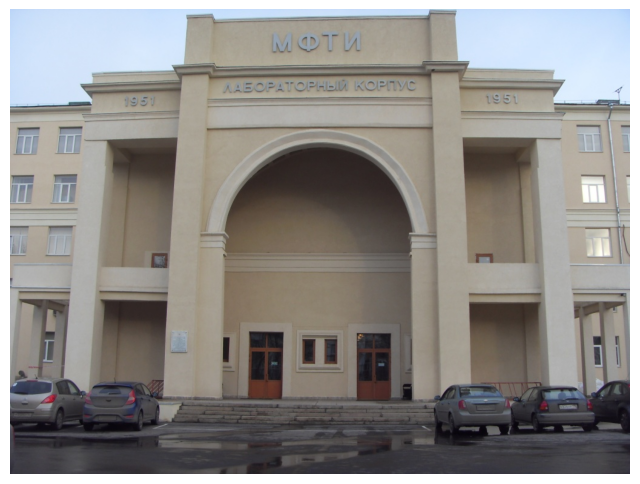

In [11]:
test_image = cv2.imread('task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
ImageOnPlot(test_image)

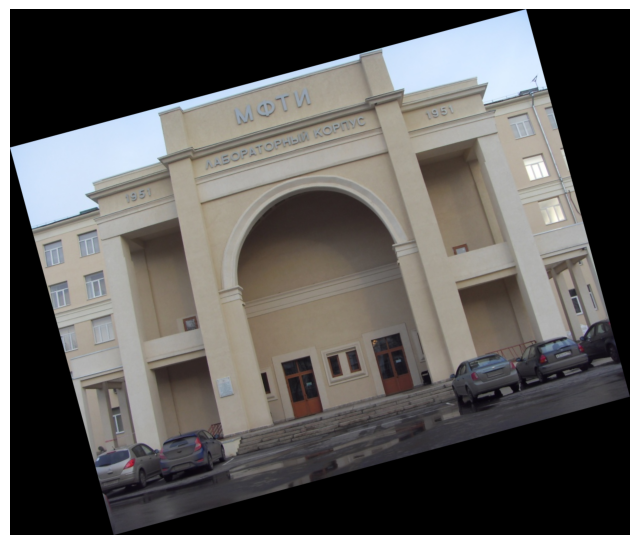

In [12]:
test_point = (200, 200)
test_angle = 15

transformed_image = Rotate(test_image, test_point, test_angle)
ImageOnPlot(transformed_image)

Проверьте как это должно было получиться

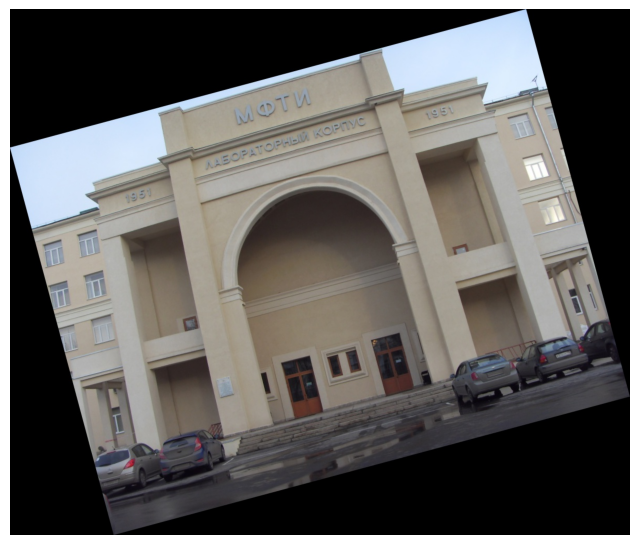

In [13]:
result_image = cv2.imread('task_3/lk_rotate.jpg')
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
ImageOnPlot(result_image)

## Задача №3.2 - Афинные преобразования

Реализуйте прототип программы, которая помогает сканировать документы с помощью приложения на телефоне.

<img src="task_3/adobe_scan.jpg"/>

Данная программа берёт изображение, находит углы листа и приводит документ к виду с вертикальной проекцией с помощью афинных преобразований.

В данной задаче предлагается обработать фото тетради, найдя её углы с помощью поиска по цвету.

**Примечание: важно сохранить пропорции тетради.**

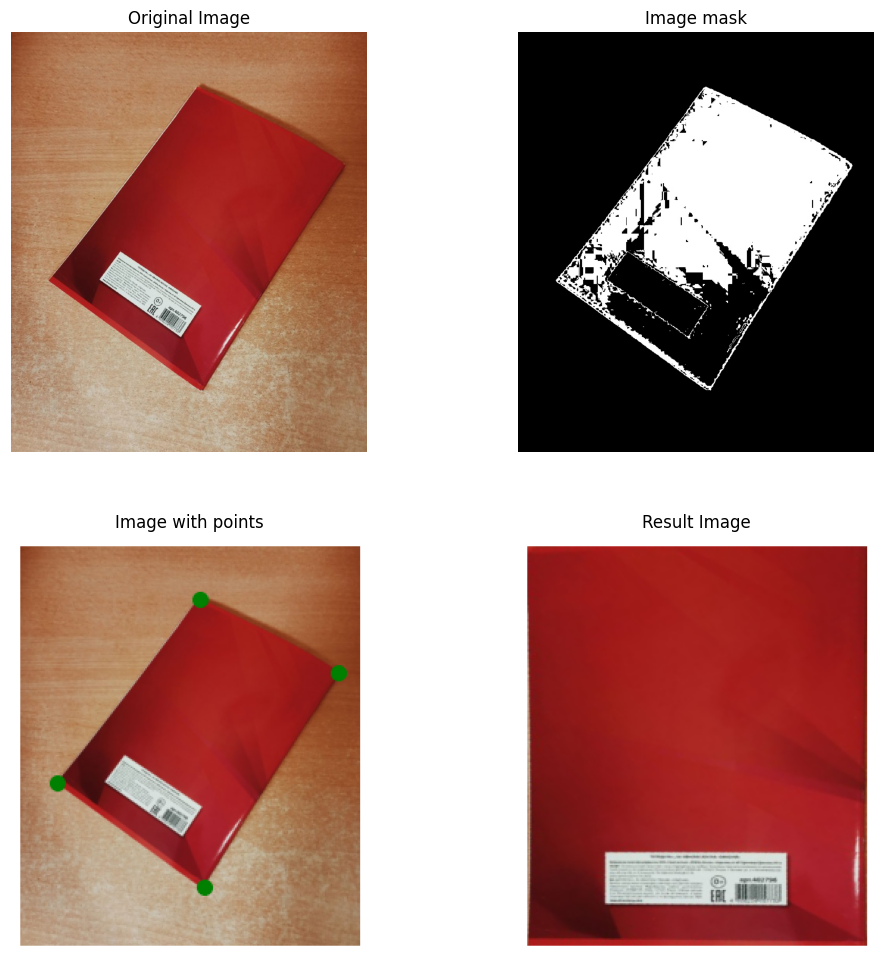

In [14]:
image = cv2.imread('task_3/notebook.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_mask = cv2.imread('task_3/notebook_mask.jpeg')
image_mask = cv2.cvtColor(image_mask, cv2.COLOR_BGR2RGB)

image_points = cv2.imread('task_3/notebook_points.png')
image_points = cv2.cvtColor(image_points, cv2.COLOR_BGR2RGB)

image_result = cv2.imread('task_3/notebook_result.png')
image_result = cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')    

plt.subplot(2, 2, 2)
plt.title("Image mask")
plt.imshow(image_mask, cmap="gray")
plt.axis('off')  

plt.subplot(2, 2, 3)
plt.title("Image with points")
plt.imshow(image_points)
plt.axis('off')  

plt.subplot(2, 2, 4)
plt.title("Result Image")
plt.imshow(image_result)
plt.axis('off')  

plt.show()

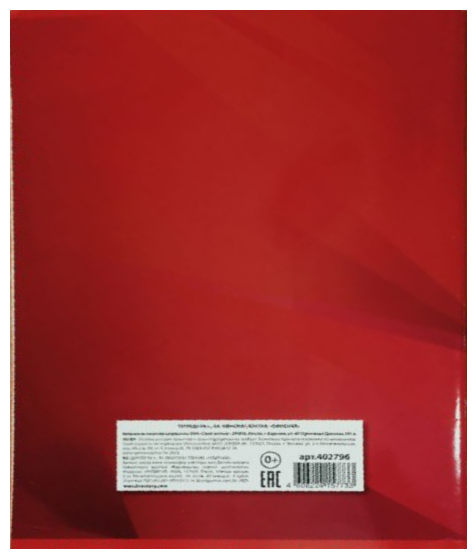

In [15]:
from task_3 import FindNotebookImage

ImageOnPlot(FindNotebookImage(image))